# 01_Data_Visualization_Teste

## TL;DR
Fazer uma descrição de 3 linhas do objetivo do notebook e conclusões presentes na análise.

## Objetivo

Descrever com clareza qual o objetivo desse notebook.

## Dados

Descrever a base de dados utilizada.

## Modelos (opcional)

Em caso de treinamento ou comparação de modelos, descrever os modelos considerados

## Conclusões
Listar **todas** as conclusões obtidas no notebook:
1. conclusão 1
2. conclusão 2
3. etc.


## Observações importantes:
1. Sempre organize o conteúdo utilizando células markdown e seções. Também utilize células de texto para escrever sua análise das figuras que forem geradas.
2. Lembre-se que essa primeira célula deve ter informação suficiente para entender o que foi feito e quais conclusões você chegou, sem ter que ler o notebook inteiro. Isso agiliza muito a busca por informações ao longo do projeto. Além disso, seu eu do futuro (ou novas pessoas que entrem no projeto) vai agradecer se o seu notebook estiver bem escrito e completo.

# Importando as Bibliotecas

In [9]:
print("C:/Users/Yama/Documents/Iniciação Científica/Github/movimento/.venv/Scripts/python.exe")

import sys
print(sys.executable)


C:/Users/Yama/Documents/Iniciação Científica/Github/movimento/.venv/Scripts/python.exe
c:\Users\Yama\Documents\Iniciação Científica\Github\movimento\.venv\Scripts\python.exe


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from dtaidistance import dtw, clustering

from sklearn.preprocessing import StandardScaler



# Importando Dataset

In [11]:
# Caminho da pasta onde estão as subpastas dos voluntários
root_dir = "../../data/data_cluster"  # Altere para o caminho correto do seu sistema

# Configuração de estilo dos gráficos
sns.set(style="whitegrid")

In [12]:
def carregar_dados(root_dir):
    """
    Lê todos os arquivos .csv de subpastas e retorna um DataFrame consolidado.
    """
    all_data = []
    for voluntario in os.listdir(root_dir):
        pasta = os.path.join(root_dir, voluntario)
        if os.path.isdir(pasta):
            for arquivo in os.listdir(pasta):
                if arquivo.endswith('.csv'):
                    caminho_arquivo = os.path.join(pasta, arquivo)
                    try:
                        # Carregar o CSV
                        df = pd.read_csv(caminho_arquivo)
                        
                        # Garantir que as colunas sejam consistentes
                        # Exemplo de ajuste: garantir que a coluna 'data' seja do tipo datetime
                        if 'data' in df.columns:
                            df['data'] = pd.to_datetime(df['data'], errors='coerce')
                        
                        # Adicionar a coluna 'voluntario'
                        df['voluntario'] = voluntario
                        
                        # Verificar e tratar valores faltantes, se necessário
                        df = df.ffill()
                        
                        all_data.append(df)
                    except Exception as e:
                        print(f"Erro ao ler {caminho_arquivo}: {e}")
    
    # Concatenar todos os dados
    return pd.concat(all_data, ignore_index=True)

dados = carregar_dados(root_dir)
print(f"Total de amostras carregadas: {dados.shape[0]}")
dados.head()


Total de amostras carregadas: 25931


,626.6068,-0.078125,1.129883,0.1328125,3.71875,-9.46875,-1.34375,-0.2080078,-0.01171875,0.8037109,...,0.8925781,0.9853516,-0.1113281,2.59375,191.2656,93.42404,260.6633,145.1859,289.9967,257.6203
0,626.6403,-0.078125,1.129883,0.132812,3.71875,-9.46875,-1.34375,-0.208008,-0.011719,0.803711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,626.6739,-0.078125,1.129883,0.132812,3.71875,-9.46875,-1.34375,-0.208008,-0.011719,0.803711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,626.7075,-0.061523,1.046875,-0.089844,-1.25000,-13.03125,-6.37500,-0.208008,-0.011719,0.803711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,626.7408,-0.061523,1.046875,-0.089844,-1.25000,-13.03125,-6.37500,-0.208008,-0.011719,0.803711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,626.7742,-0.061523,1.046875,-0.089844,-1.25000,-13.03125,-6.37500,-0.208008,-0.011719,0.803711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Selecionando apenas colunas numéricas
dados_numericos = dados.select_dtypes(include=[np.number])

# Verificando valores NaN ou infinitos nas colunas numéricas
if np.any(np.isnan(dados_numericos)) or np.any(np.isinf(dados_numericos)):
    print("Existem valores NaN ou infinitos nos dados.")
    
    # Substituindo valores NaN ou infinitos por 0 nas colunas numéricas
    dados_numericos = dados_numericos.replace([np.inf, -np.inf], np.nan)
    dados_numericos = dados_numericos.fillna(0)  # Substituir NaN por 0
else:
    print("Os dados estão livres de valores NaN e infinitos.")

# Selecionando as últimas 6 colunas para a clusterização
dados_cluster = dados.iloc[:, -6:]

# Escalando os dados com StandardScaler
scaler = StandardScaler()
dados_cluster_scaled = scaler.fit_transform(dados_numericos)


Existem valores NaN ou infinitos nos dados.


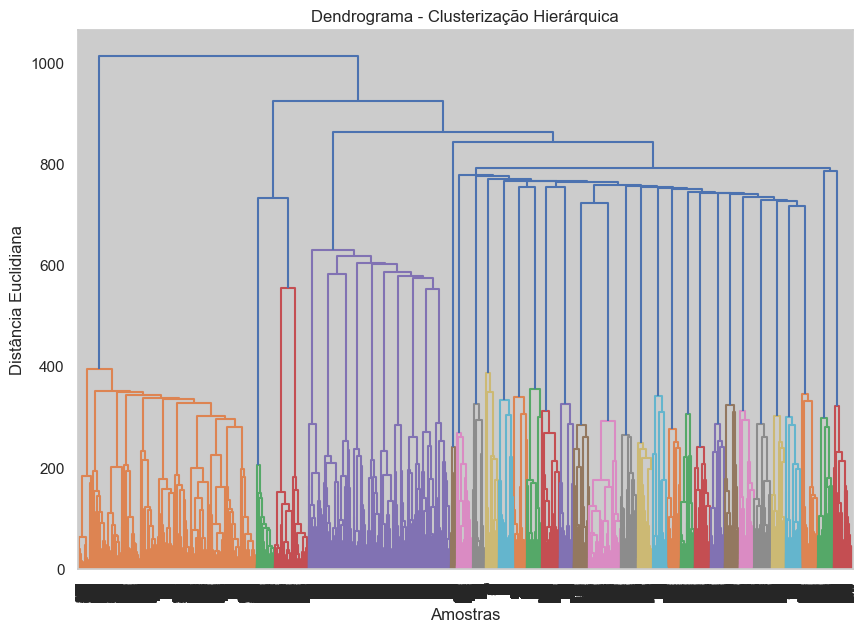

In [14]:
# Usando o método 'ward' para linkage
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(dados_cluster_scaled, method='ward')

# Gerando o dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrograma - Clusterização Hierárquica")
plt.xlabel("Amostras")
plt.ylabel("Distância Euclidiana")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# 1. Selecionar as últimas 6 colunas numéricas
colunas_numericas = dados.select_dtypes(include=np.number).columns
ultimas_colunas = colunas_numericas[-6:]
dados_numericos = dados[ultimas_colunas].fillna(dados[ultimas_colunas].mean())

# 2. Aplicar linkage (usando distância Euclidiana)
Z = linkage(dados_numericos, method='ward')  # ou 'complete', 'average'

# 3. Plotar o dendrograma
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Dendrograma - Clusterização Hierárquica (Euclidiana)")
plt.xlabel("Amostras")
plt.ylabel("Distância")
plt.grid(True)
plt.show()

# 4. Gerar rótulos de cluster (ex: 3 clusters)
labels = fcluster(Z, t=3, criterion='maxclust')
dados_numericos['cluster'] = labels


In [ ]:
dados_amostras = dados.sample(5000)  # Selecionando uma amostra menor, se necessário
variaveis_cluster = dados_amostras.iloc[:, -6:]


In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados_cluster_scaled = scaler.fit_transform(variaveis_cluster)

from scipy.spatial.distance import pdist, squareform

dist_matrix = pdist(dados_cluster_scaled, metric='euclidean')
dist_matrix = squareform(dist_matrix)


In [ ]:
from scipy.cluster.hierarchy import linkage

# Usando o método 'ward' para linkage
Z = linkage(dados_cluster_scaled, method='ward')

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrograma da Clusterização Hierárquica")
plt.xlabel("Amostras")
plt.ylabel("Distância")
plt.show()


ValueError: The condensed distance matrix must contain only finite values.

NameError: name 'dados' is not defined

In [ ]:
from scipy.cluster.hierarchy import linkage

# Aplicando o método 'ward' para linkage após limpar os dados
Z = linkage(dados_cluster_scaled, method='ward')

# Visualizar o dendrograma
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrograma da Clusterização Hierárquica")
plt.xlabel("Amostras")
plt.ylabel("Distância")
plt.show()


: 

In [ ]:
print("Formato dos dados numéricos:", dados_numericos.shape)

Formato dos dados numéricos: (25931, 6)


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Criar linkage matrix (usando distância Euclidiana)
Z = linkage(dados_numericos, method='ward')  # também pode testar: 'complete', 'average'

# Plotar dendrograma
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Dendrograma - Clusterização Hierárquica (Euclidiana)")
plt.xlabel("Amostras")
plt.ylabel("Distância")
plt.grid(True)
plt.show()

# Obter rótulos dos clusters (ex: 3 grupos)
labels = fcluster(Z, t=3, criterion='maxclust')

# Adicionar os rótulos ao DataFrame
dados_numericos['cluster'] = labels


: 

Total de amostras carregadas: 25931


The compiled dtaidistance C-OMP library is not available.
Use Python's multiprocessing library for parellelization (use_mp=True).
Call dtw.try_import_c() to get more verbose errors.
See the documentation for alternative installation options.


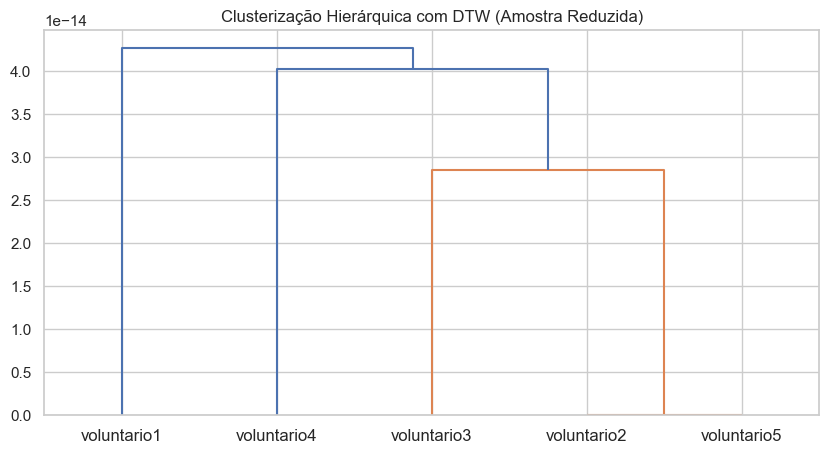

In [ ]:

print(f"Total de amostras carregadas: {dados.shape[0]}")

colunas_numericas = dados.select_dtypes(include=np.number).columns
ultimas_colunas = colunas_numericas[-6:]
dados_numericos = dados[ultimas_colunas].copy()
dados_numericos = dados_numericos.fillna(dados_numericos.mean())

# === 4. Amostra reduzida por voluntário para evitar estouro de memória ===
amostras_reduzidas = dados_numericos.groupby(dados['voluntario']).mean()

# === 5. Preparar séries e aplicar DTW ===
series = [row.to_numpy() for _, row in amostras_reduzidas.iterrows()]

# Calcular matriz de distância com DTW
distance_matrix = dtw.distance_matrix_fast(series, compact=True)

# Criar linkage para clusterização hierárquica
Z = linkage(distance_matrix, method='complete')

# === 6. Plotar dendrograma ===
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=amostras_reduzidas.index.tolist())
plt.title("Clusterização Hierárquica com DTW (Amostra Reduzida)")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# 1. Selecionar as últimas 6 colunas numéricas
colunas_numericas = dados.select_dtypes(include=np.number).columns
ultimas_colunas = colunas_numericas[-6:]
dados_numericos = dados[ultimas_colunas].fillna(dados[ultimas_colunas].mean())

# 2. Aplicar linkage (usando distância Euclidiana)
Z = linkage(dados_numericos, method='ward')  # ou 'complete', 'average'

# 3. Plotar o dendrograma
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Dendrograma - Clusterização Hierárquica (Euclidiana)")
plt.xlabel("Amostras")
plt.ylabel("Distância")
plt.grid(True)
plt.show()

# 4. Gerar rótulos de cluster (ex: 3 clusters)
labels = fcluster(Z, t=3, criterion='maxclust')
dados_numericos['cluster'] = labels


# Conclusões

Aqui você deve listar todas as conclusões obtidas ao longo do notebook.
Pode copiar todo o conteúdo dessa seção lá na parte de conclusões do cabeçalho.